In [231]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

merged_data = pd.merge(city_data, ride_data, on=["city","city"] )

# Display the data table for preview

merged_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [208]:
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [209]:
grouped_by_city.head(1)

,driver_count,type,date,fare,ride_id
city,,,,,
Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
Williamsstad,59,Urban,2018-01-23 17:51:24,19.62,125986195523
Port Angela,67,Urban,2018-04-17 06:23:18,16.34,7120534266772
Rodneyfort,34,Urban,2018-02-10 23:22:03,23.44,5149245426178
West Robert,39,Urban,2018-02-15 04:21:47,12.28,1442502460354
West Anthony,70,Urban,2018-03-06 02:27:01,10.02,9396763280782
West Angela,48,Urban,2018-01-12 01:45:27,26.86,4820052223501
Martinezhaven,25,Urban,2018-03-19 15:31:26,5.30,264337981979
Karenberg,22,Urban,2018-03-11 17:26:12,36.15,7796761531541


In [210]:
grouped_by_city = merged_data.set_index('city').groupby(["city"])
grouped_by_city.head()
# rides per city
ridesPerCity = grouped_by_city["ride_id"].count()
# avg fare 
avgFarePerCity = round(grouped_by_city["fare"].sum() / ridesPerCity, 2)
# classify each city by city type
cityType = city_data.set_index('city')['type']
# driver count per city 
driverCount = city_data.set_index('city')['driver_count']

ride_summary = pd.DataFrame({"Type": cityType,
                             "Rides": ridesPerCity,
                             "Avg Fare": avgFarePerCity,
                             "Driver Count": driverCount})

ride_summary.head()

,Type,Rides,Avg Fare,Driver Count
Amandaburgh,Urban,18,24.64,12
Barajasview,Urban,22,25.33,26
Barronchester,Suburban,16,36.42,11
Bethanyland,Suburban,18,32.96,22
Bradshawfurt,Rural,10,40.06,7


## Bubble Plot of Ride Sharing Data

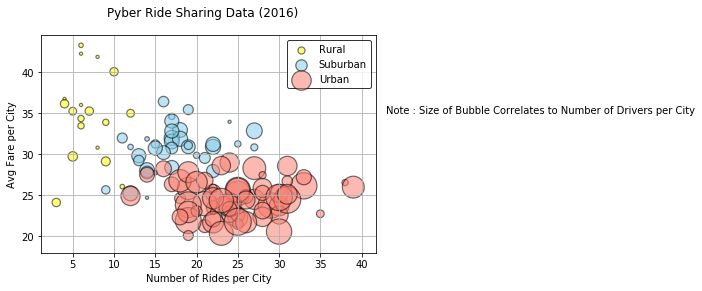

In [247]:
# Obtain the x and y coordinates for each of the three city types
rural = ride_summary[ride_summary['Type'] == 'Rural']
suburban = ride_summary[ride_summary['Type'] == 'Suburban']
urban = ride_summary[ride_summary['Type'] == 'Urban']

# Build the scatter plots for each city types
plt.scatter(rural['Rides'], rural['Avg Fare'], s = rural['Driver Count']*10, color = 'yellow', edgecolor = 'black', label = 'Rural', alpha = .55, linewidths=1.2)
plt.scatter(suburban['Rides'], suburban['Avg Fare'], s = suburban['Driver Count']*10, color = 'skyblue', edgecolor = 'black', label = 'Suburban', alpha = .55, linewidths=1.2)
plt.scatter(urban['Rides'], urban['Avg Fare'], s = urban['Driver Count']*10, color = 'salmon', edgecolor = 'black', label = 'Urban', alpha = .55, linewidths=1.2)

# Incorporate the other graph properties
plt.suptitle('Pyber Ride Sharing Data (2016)')
plt.xlabel('Number of Rides per City')
plt.ylabel('Avg Fare per City')
plt.grid()

# Create a legend
lgnd = plt.legend(frameon = True, edgecolor = 'black')

# Incorporate a text label regarding circle size
plt.text(43,35,'Note : Size of Bubble Correlates to Number of Drivers per City')

# Save Figure
plt.savefig("scatter.png")
plt.show()

In [242]:
# random calcs to determine how to calc last pie graph
ruralDCount = rural['Driver Count'].sum()
urbanDCount = urban['Driver Count'].sum()
suburbanDCount = suburban['Driver Count'].sum()
suburbanDCount

490

## Total Fares by City Type

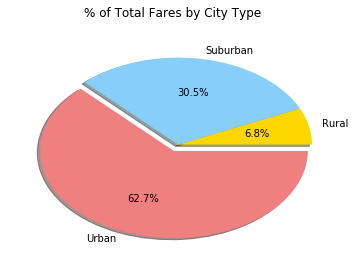

In [244]:
# Calculate Type Percents
fare_pie_chart = merged_data.groupby(["type"])["fare"].sum()
# Build Pie Chart
plt.pie(fare_pie_chart, labels = fare_pie_chart.index, autopct = "%1.1f%%", colors = ('gold','lightskyblue','lightcoral'), explode = (0, 0 , .08), shadow = True)
plt.suptitle("% of Total Fares by City Type")
# Save Figure
plt.savefig("total_fares.png")
plt.show()

## Total Rides by City Type

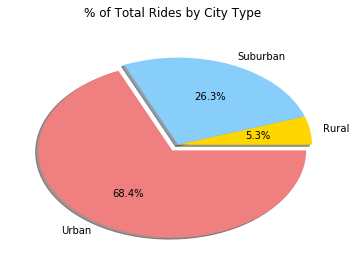

In [245]:
# Calculate Ride Percents
type_pie_chart = merged_data.groupby(["type"])["ride_id"].count()
# Build Pie Chart
plt.pie(type_pie_chart, labels = type_pie_chart.index, autopct = "%1.1f%%", colors = ('gold','lightskyblue','lightcoral'), explode = (0, 0 , .08), shadow = True)
plt.suptitle("% of Total Rides by City Type")
# Save Figure
plt.savefig("total_rides.png")
plt.show()

## Total Drivers by City Type

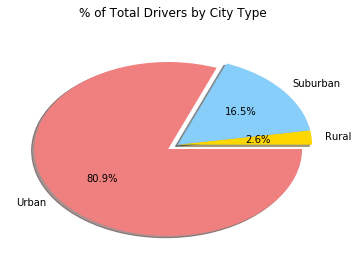

In [246]:
# Calculate Driver Percents
drivers_pie_chart = city_data.groupby(["type"])['driver_count'].sum()
drivers_pie_chart
# Build Pie Charts
plt.pie(drivers_pie_chart, labels = drivers_pie_chart.index, autopct = "%1.1f%%", colors = ('gold','lightskyblue','lightcoral'), explode = (0, 0 , .09), shadow = True)
plt.suptitle("% of Total Drivers by City Type")
# Save Figure
plt.savefig("total_drivers.png")
plt.show()

# End of pyber exercise...